<a href="https://colab.research.google.com/github/AhrazKhan31/Deep-Learning-Lab/blob/main/Experiment2_NN_using_make_moons_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

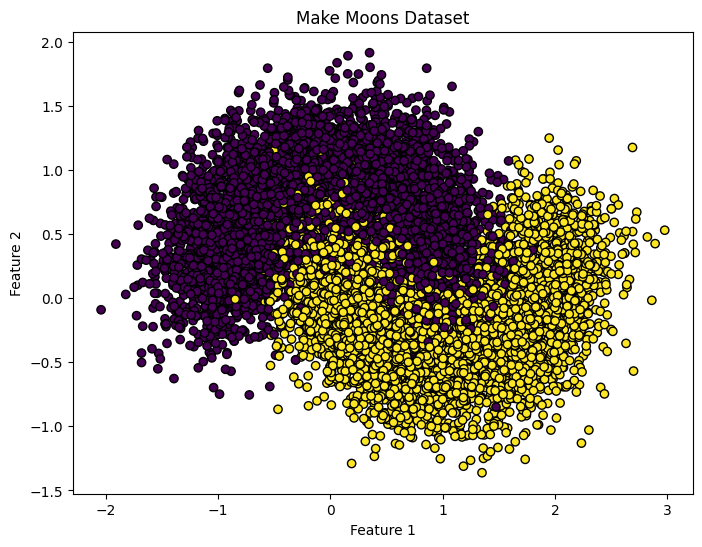

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=10000, noise=0.3, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

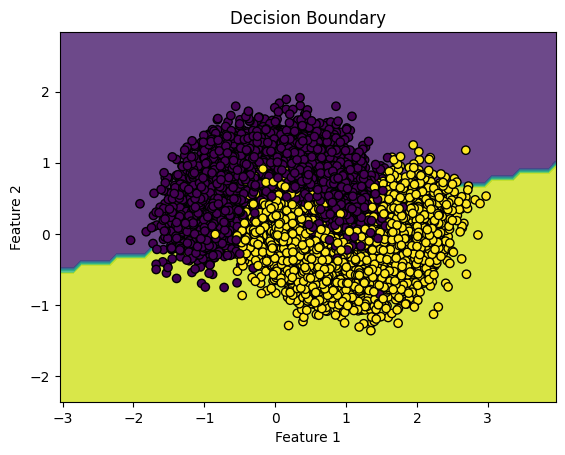

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)

            error = output - y
            d_output = error * self.sigmoid_derivative(output)
            d_weights = np.dot(X.T, d_output)
            d_bias = np.sum(d_output, axis=0, keepdims=True)

            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

In [ ]:
#Neural Network without Hidden Layer
nn = NeuralNetwork(input_size=2, output_size=1)

nn.train(X_train, y_train.reshape(-1, 1), learning_rate=0.1, epochs=100)

In [ ]:
predictions = nn.predict(X_test)

accuracy = np.mean(predictions == y_test.reshape(-1, 1))
print("Accuracy:", accuracy)

Accuracy: 0.8645


In [ ]:
predictions = nn.predict(X_test)
misclassification_rate = np.mean(predictions != y_test.reshape(-1, 1))

print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.1355


In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_layer_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        return self.sigmoid(np.dot(self.hidden_layer_output, self.weights2) + self.bias2)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(int)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)

            error = output - y
            d_output = error * self.sigmoid_derivative(output)
            d_hidden_layer = np.dot(d_output, self.weights2.T) * self.relu_derivative(self.hidden_layer_output)

            d_weights2 = np.dot(self.hidden_layer_output.T, d_output)
            d_bias2 = np.sum(d_output, axis=0, keepdims=True)
            d_weights1 = np.dot(X.T, d_hidden_layer)
            d_bias1 = np.sum(d_hidden_layer, axis=0, keepdims=True)

            self.weights1 -= learning_rate * d_weights1
            self.bias1 -= learning_rate * d_bias1
            self.weights2 -= learning_rate * d_weights2
            self.bias2 -= learning_rate * d_bias2

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

#Neural Network using Hidden Layer
nn = NeuralNetwork(input_size=2, hidden_size=10, output_size=1)

nn.train(X_train, y_train.reshape(-1, 1), learning_rate=0.001, epochs=100)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test.reshape(-1, 1))
print("Accuracy:", accuracy)

Accuracy: 0.867


In [ ]:
predictions = nn.predict(X_test)
misclassification_rate = np.mean(predictions != y_test.reshape(-1, 1))

print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.132


In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.bias1 = np.zeros((1, hidden_size1))
        self.weights2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.bias2 = np.zeros((1, hidden_size2))
        self.weights3 = np.random.randn(hidden_size2, output_size) * 0.01
        self.bias3 = np.zeros((1, output_size))

    def forward(self, X):
       self.hidden_layer1_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
       self.hidden_layer2_output = self.sigmoid(np.dot(self.hidden_layer1_output, self.weights2) + self.bias2)
       return self.sigmoid(np.dot(self.hidden_layer2_output, self.weights3) + self.bias3)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(int)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)

            error = output - y
            d_output = error * self.sigmoid_derivative(output)

            d_hidden_layer2 = np.dot(d_output, self.weights3.T) * self.sigmoid_derivative(self.hidden_layer2_output)
            d_weights3 = np.dot(self.hidden_layer2_output.T, d_output)
            d_bias3 = np.sum(d_output, axis=0, keepdims=True)

            d_hidden_layer1 = np.dot(d_hidden_layer2, self.weights2.T) * self.sigmoid_derivative(self.hidden_layer1_output)
            d_weights2 = np.dot(self.hidden_layer1_output.T, d_hidden_layer2)
            d_bias2 = np.sum(d_hidden_layer2, axis=0, keepdims=True)

            d_weights1 = np.dot(X.T, d_hidden_layer1)
            d_bias1 = np.sum(d_hidden_layer1, axis=0, keepdims=True)

            self.weights1 -= learning_rate * d_weights1
            self.bias1 -= learning_rate * d_bias1
            self.weights2 -= learning_rate * d_weights2
            self.bias2 -= learning_rate * d_bias2
            self.weights3 -= learning_rate * d_weights3
            self.bias3 -= learning_rate * d_bias3

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

#Neural Network using multiple Hidden Layers
nn = NeuralNetwork(input_size=2, hidden_size1=5, hidden_size2=7, output_size=1)

nn.train(X_train, y_train.reshape(-1, 1), learning_rate=0.01, epochs=200)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test.reshape(-1, 1))
print("Accuracy:", accuracy)

Accuracy: 0.8685


In [ ]:
predictions = nn.predict(X_test)
misclassification_rate = np.mean(predictions != y_test.reshape(-1, 1))

print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.1315
